# Розпізнавання об'єктів на зображеннях з набору даних CIFAR-10

## prapare import / variable

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import utils
from keras.models import load_model
# from keras import regularizers
# from keras.preprocessing import image

import os
%matplotlib inline

In [3]:
# Розмір міні-вибірки
batch_size = 16
# Кількість епох для навчання
epochs = 30
# Розмір зображеннь
img_width, img_height = 150, 150
img_size = (img_width, img_height)
# Кількість каналів в зображенні
img_channels = 3
Image_rgb_size = (img_width, img_height, img_channels)

# Кількість класів зображень
nb_classes = 2
# Назви класів
classes = ['кіт', 'собака']

imgs downloaded from: https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [16]:
# Частина набору даних для тестування
test_data_portion = 0.15
# Частина набору даних для перевірки
val_data_portion = 0.15

nb_images = 12500

nb_train_samples = nb_images * 2 * (1 - test_data_portion - val_data_portion)
nb_test_samples = nb_val_samples = nb_images * 2 * val_data_portion
nb_train_samples, nb_val_samples, nb_test_samples

(17500.0, 3750.0, 3750.0)

## Prapare data

In [15]:
# Каталог з набором даних
data_dir = 'PetImages'

# Каталог з даними для навчання
train_dir = 'train'
# Каталог з даними для перевірки
val_dir = 'val'
# Каталог з даними длятестування
test_dir = 'test'

### Create folder

In [13]:
import shutil

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name,"cats"))
    os.makedirs(os.path.join(dir_name,"dogs"))

In [5]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

### Copy to folder

In [14]:
import shutil

def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(
            os.path.join(source_dir, "Cat", str(i) + ".jpg"),
            os.path.join(dest_dir, "cats")
        )
        shutil.copy2(
            os.path.join(source_dir, "Dog", str(i) + ".jpg"),
            os.path.join(dest_dir, "dogs")
        )

In [9]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
start_val_data_idx, start_test_data_idx

(8750, 10625)

In [15]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

## Створюємо нейронну мережу

### Create model

In [19]:
# Створюємо послідовну модель
model = Sequential()

# First Conv layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=Image_rgb_size))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third, fourth, fifth convolution layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 64)       

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

### DataGenerator

In [23]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


## Навчаємо нейрону мережу

In [18]:
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data=val_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_val_samples//batch_size,
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Оцінюємо якість  навчання мережі

In [ ]:
# Оцінюємо якість навчання моделі на тестових даних 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точність роботи на тестових даних: %.2f%%" % (scores[1]*100))

Точність роботи на тестових даних: 82.26%


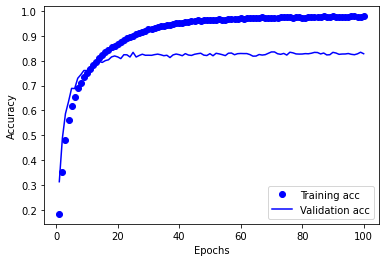

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Зберігаємо навчену нейрону мережу

In [ ]:
model.save("Recognition_lab7.h5")

In [ ]:
!ls

In [ ]:
files.download("Recognition_lab7.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Завантажуємо попередньо навчену нейронну мережу 


Завантажуємо файл з навченою моделлю 

In [ ]:
#!wget https://github.com/Kolyanuss/Lab_Univer/blob/master/Lab_4k_1sem/Recognise/lab7/Recognition_lab7.h5
# f = files.upload()

Завантажуємо модель в пам'ять 

In [ ]:
model.load_model('Recognition_lab7.h5')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 8, 8, 256)        

## Застосовуємо мережу для розпізнавання об'єктів на зображеннях 

**Перегляд зображення з набору даних для тестування**

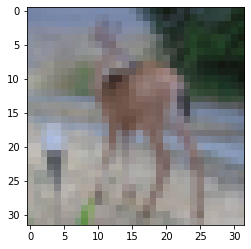

In [ ]:
index=100
plt.imshow(X_test[index])
plt.show()

### підготовка

**Перетворення тестового зображення**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распізнавання**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 16ms/step


**Друкуємо результати розпізнавання**

In [ ]:
print(prediction)

[[1.6866928e-04 7.7620763e-07 1.6845949e-04 8.2829873e-05 1.2462311e-01
  2.9184742e-04 3.6317808e-06 8.7463105e-01 1.5016428e-06 2.8105756e-05]]


### результат

**Перетворюємо результати з формату one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print("Predict: ", classes[prediction])
print("Вірна відповідь: ", classes[y_test[index][0]])

Predict:  кінь
Вірна відповідь:  олень


## Розпізнаємо свої зображення

In [ ]:
files.upload()

Перевіряємо завантаження файлів

In [ ]:
!ls

**Дивимось завантажений малюнок**

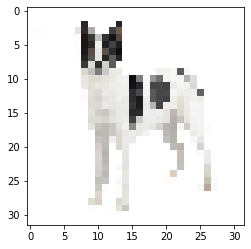

In [ ]:
img_path = 'canaan.jpg'
img = utils.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Перетворюємо малюнок в масив для розпізнавання**

In [ ]:
x = utils.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

1/1 [==============================] - 0s 24ms/step
літак
